In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [12]:
training_set=dataset_train.iloc[:,1:2].values

In [13]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
mm=MinMaxScaler(feature_range=(0,1))

In [15]:
training_set_scaled=mm.fit_transform(training_set)

In [17]:
len(training_set_scaled)

1258

In [20]:
x_train=[]
y_train=[]
for i in range(60, 1258):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [25]:
len(y_train)

1198

In [26]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [28]:
regressor=Sequential()

In [33]:
x_train[0][0]

array([0.08581368])

In [34]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))

In [36]:
regressor.add(Dropout(0.2))

In [37]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [38]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [39]:
regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(0.2))

In [41]:
regressor.add(Dense(units=1))

In [42]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [43]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0422
Epoch 2/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0062
Epoch 4/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0061
Epoch 5/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0050
Epoch 10/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0038
Epoch 12/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0043
Epoch 13/100


38/38 [==============================] - 5s 129ms/step - loss: 0.0015
Epoch 100/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0015


In [44]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [46]:
real_stock_price=dataset_test.iloc[:,1:2].values

In [49]:
dataset_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [50]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [55]:
inputs = inputs.reshape(-1,1)

In [59]:
inputs = mm.transform(inputs)

In [60]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [62]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = mm.inverse_transform(predicted_stock_price)

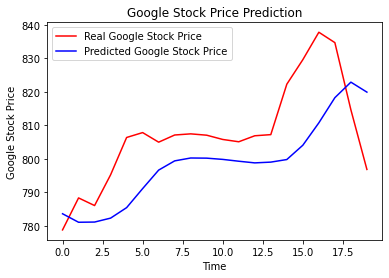

In [63]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()